In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [128]:
sal=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [129]:
type(sal)

pandas.core.frame.DataFrame

In [130]:
sal.shape

(397, 6)

There are 397 rows and 6 columns in our dataframe

In [131]:
print("Columns present in our dataset:\n",sal.columns)

Columns present in our dataset:
 Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')


In [132]:
# To get good overview of the dataset
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage. The dataset contains both object and int type data. We will encode the object datatypes using appropriate encoding techniques before building machine learning models. Since counts of all the columns are same, which means there are no null values present in the dataset.

In [133]:
sal.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

We can see there are no missing values in any of the columns.

# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='rank', ylabel='count'>

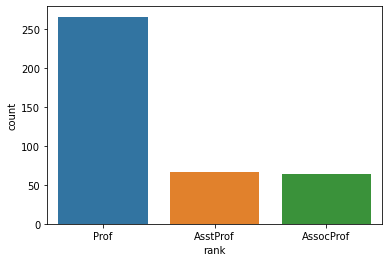

In [134]:
sns.countplot(sal["rank"])


<AxesSubplot:xlabel='discipline', ylabel='count'>

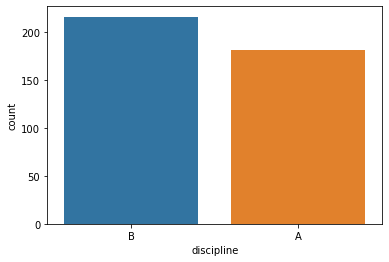

In [135]:
sns.countplot(sal["discipline"])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='count'>

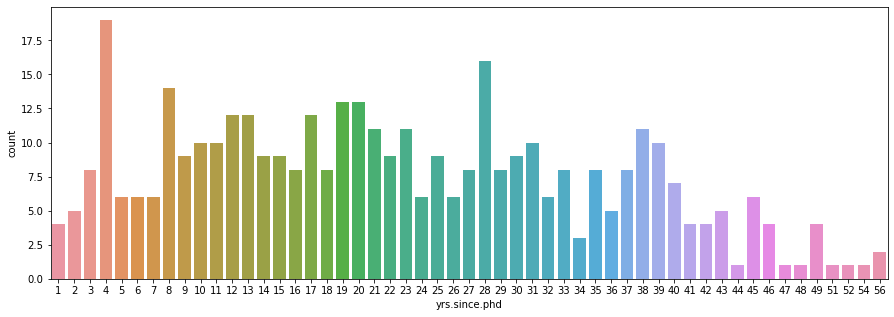

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(sal['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='count'>

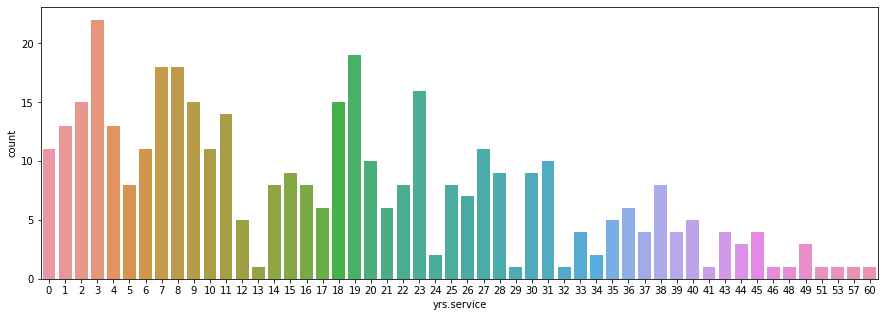

In [136]:
plt.figure(figsize=(15,5))
sns.countplot(sal['yrs.service'])

<AxesSubplot:xlabel='sex', ylabel='count'>

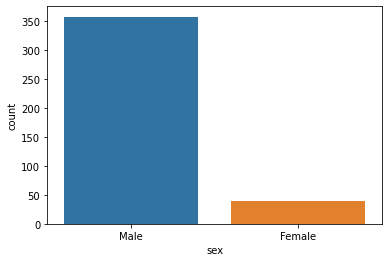

In [137]:
sns.countplot(sal["sex"])

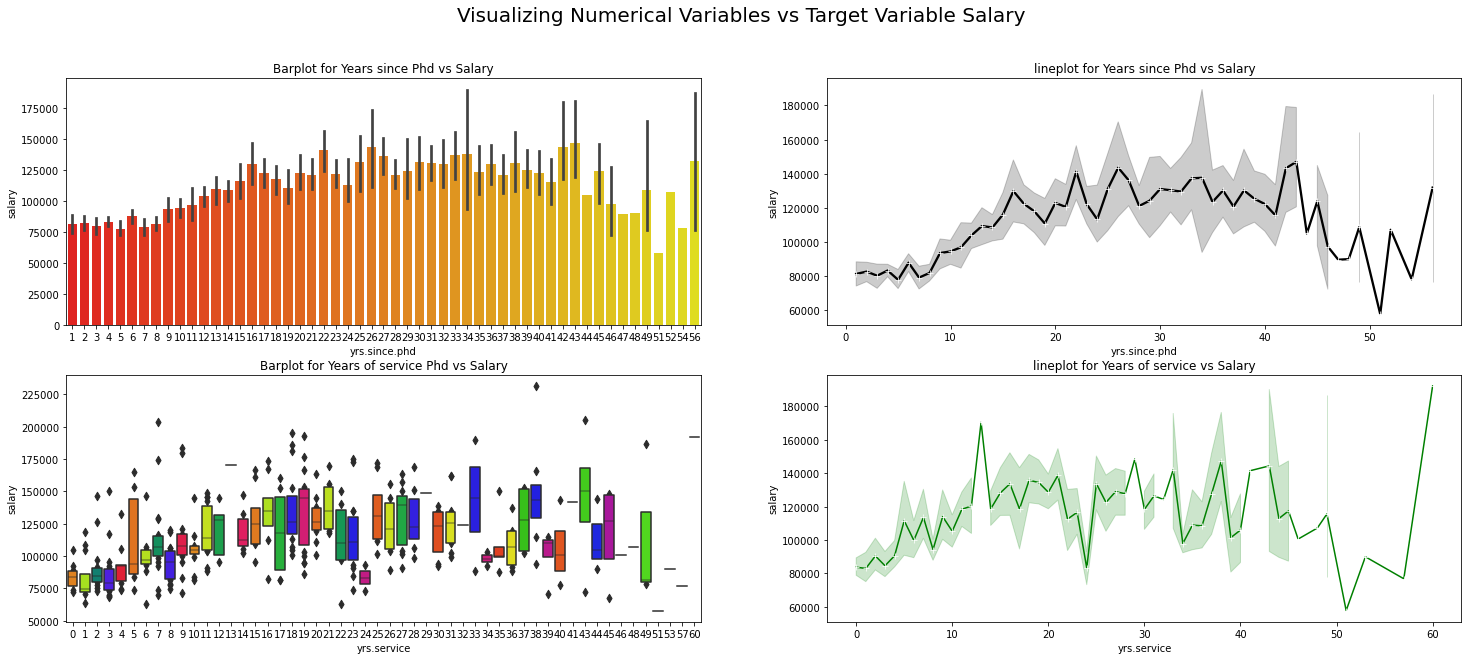

In [140]:
plt.figure(figsize = (25,10))
plt.suptitle("Visualizing Numerical Variables vs Target Variable Salary",fontsize=20)

plt.subplot(2,2,1)
plt.title("Barplot for Years since Phd vs Salary")
sns.barplot(x= sal['yrs.since.phd'], y= sal['salary'], data=sal, palette = "autumn", linewidth=2)

plt.subplot(2,2,2)
plt.title("lineplot for Years since Phd vs Salary")
sns.lineplot(x = sal['yrs.since.phd'], y= sal['salary'], marker="+", color='k', linewidth=2.3)

plt.subplot(2,2,3)
plt.title("Barplot for Years of service Phd vs Salary")
sns.boxenplot(x='yrs.service', y='salary', data=sal, palette = "prism", color='k')

plt.subplot(2,2,4)
plt.title("lineplot for Years of service vs Salary")
sns.lineplot(x='yrs.service', y='salary', data=sal, marker="+", color='g')

plt.show()

Form above figures, we can see salary is higher with more no. of years of service and years since phd.

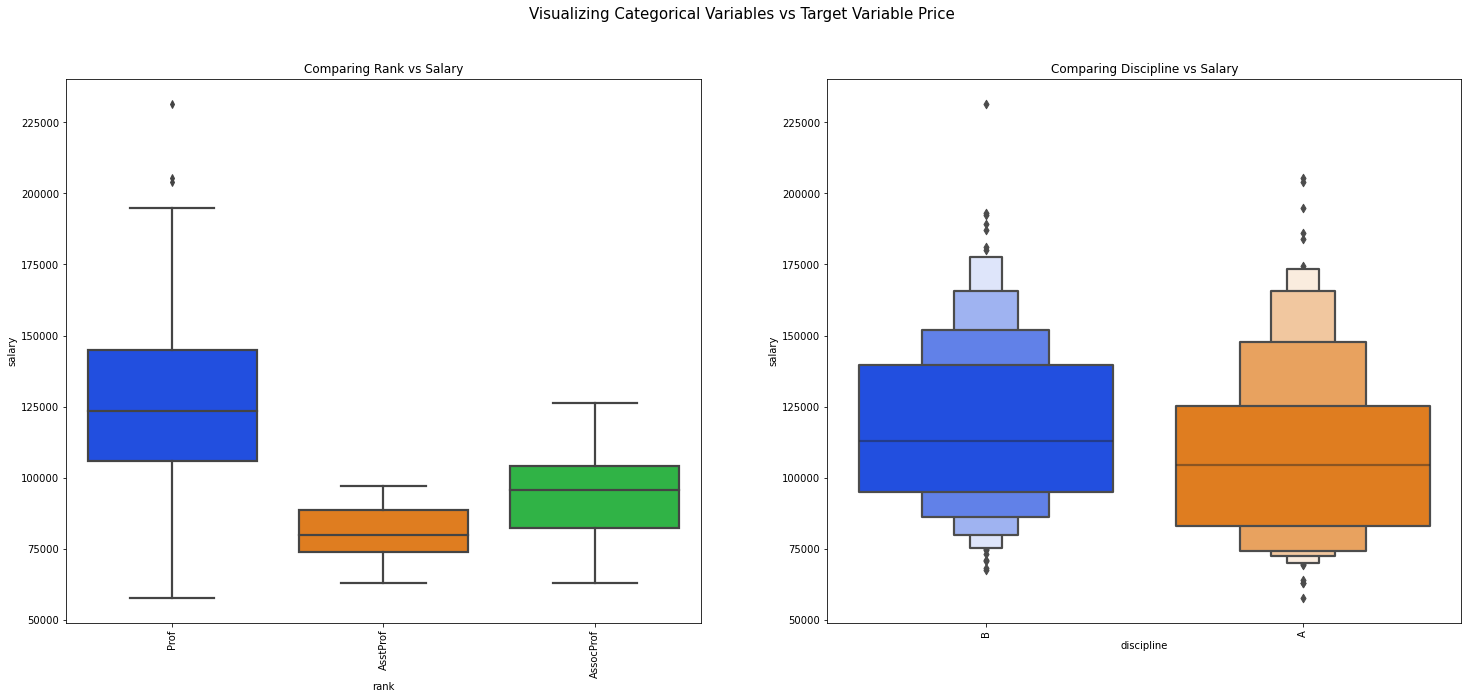

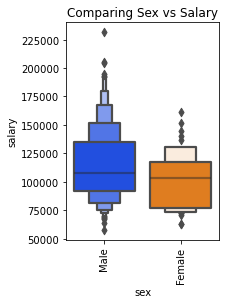

In [153]:
plt.figure(figsize = (25,10))
plt.suptitle("Visualizing Categorical Variables vs Target Variable Price\n",fontsize=15)

# Checking how salary changes with rank
plt.subplot(1,2,1)
plt.title("Comparing Rank vs Salary")
sns.boxplot(x= sal['rank'],y= sal['salary'],palette = "bright",linewidth=2.2)
plt.xticks(rotation = 90)

# Checking how salary changes with discipline
plt.subplot(1,2,2)
plt.title("Comparing Discipline vs Salary")
sns.boxenplot(x = sal['discipline'],y= sal['salary'],palette = "bright",linewidth=2.2)
plt.xticks(rotation = 90)
plt.show()

# Checking how salary changes with sex
plt.subplot(1,2,2)
plt.title("Comparing Sex vs Salary")
sns.boxenplot(x = sal['sex'],y= sal['salary'],palette = "bright",linewidth=2.2)
plt.xticks(rotation = 90)
plt.show()

From above figures, we can see salary is higher for professors and discipline B gets higher salary. Also, Male gets more salary than female.

In [154]:
sal.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In the 5 point summary, we can see there are skewness in data

# Skewness

In [155]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(sal['rank'])
dis_label = le.fit_transform(sal['discipline']) 
sex_label = le.fit_transform(sal['sex'])

# printing label
label
dis_label
sex_label

sal["rank"] = label
sal["discipline"] = dis_label
sal["sex"] = sex_label
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [156]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


In [157]:
sal.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Skewness threshold taken +/- 0.75

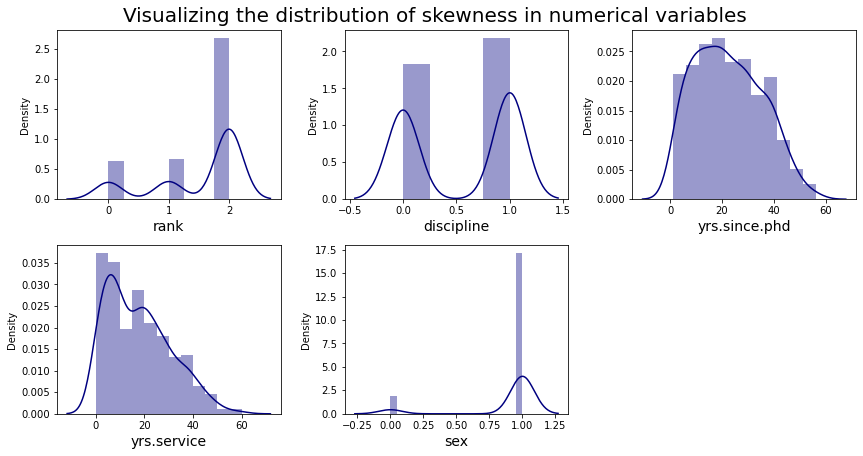

In [163]:
# Checking how the data has been distriubted in each column

col = ['rank','discipline', 'yrs.since.phd','yrs.service','sex']
plt.figure(figsize=(12,12),facecolor='white')
plt.suptitle("Visualizing the distribution of skewness in numerical variables",fontsize=20)
plotnumber=1
for i in col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(sal[i], color="navy")
        plt.xlabel(i,fontsize=14)
    plotnumber+=1
plt.tight_layout()

The normal distribution shows the data is skewed

# Correlation

In [164]:
sal.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


Correlation using heatmap:

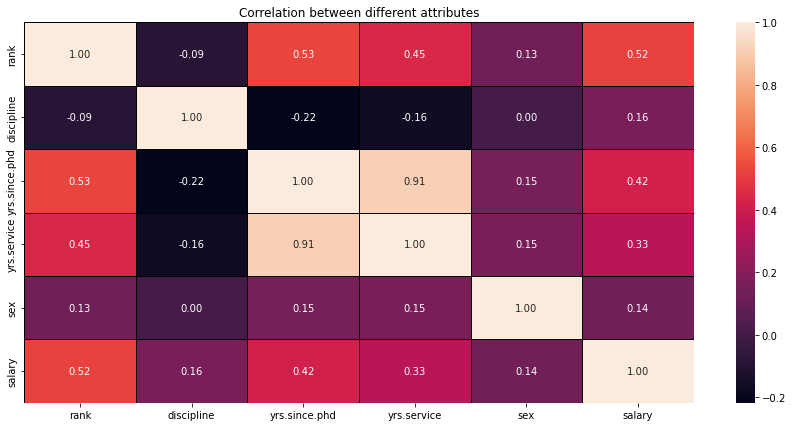

In [165]:
plt.figure(figsize=(15,7))
sns.heatmap(sal.corr(),annot=True,linewidth=1,linecolor='black',fmt='.2f')
plt.title("Correlation between different attributes")
plt.show()

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature with another.
It contains both positive and negative correlation.
The columns rank and years since phd are highly correlated with the target column compared to other column.
The other features have very less correlation with the target column.

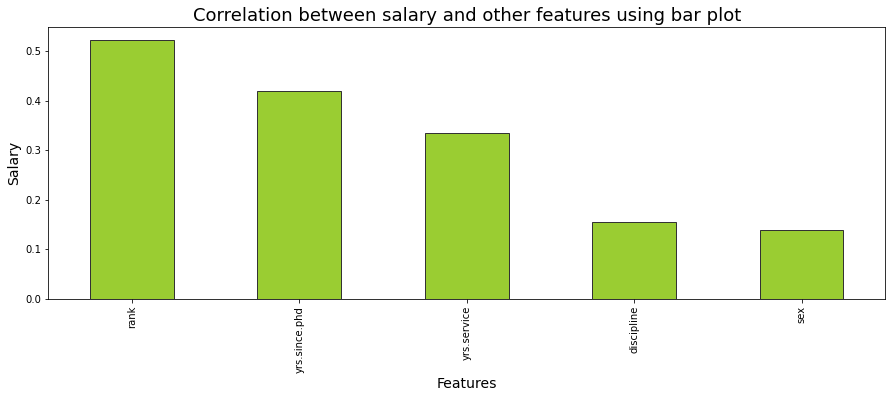

In [166]:
plt.figure(figsize=(15,5))
sal.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='yellowgreen',edgecolor=".2")
plt.xlabel('Features',fontsize=14)
plt.ylabel('Salary',fontsize=14)
plt.title('Correlation between salary and other features using bar plot',fontsize=18)
plt.show()

In [167]:
sal.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


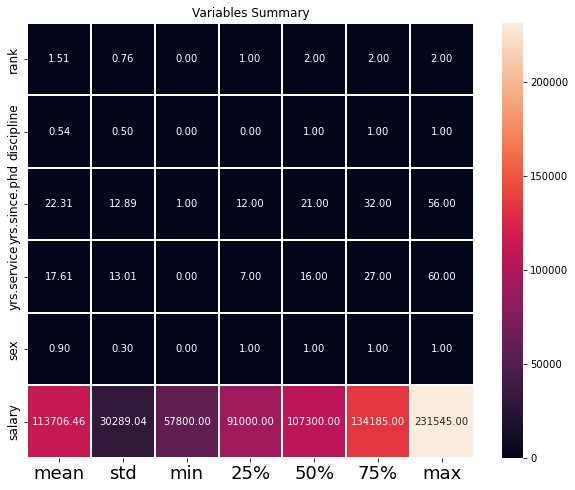

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(round(sal.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

# Outliers:

In [168]:
import warnings
warnings.filterwarnings('ignore')

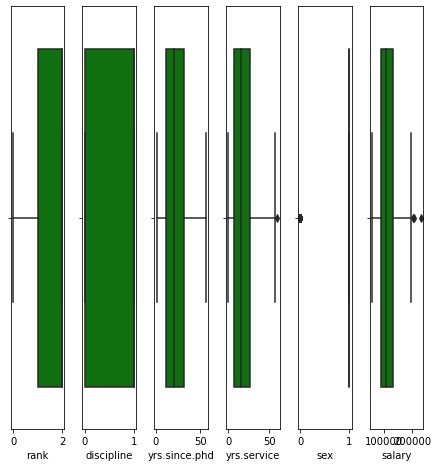

In [169]:
collist=sal.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(sal[collist[i]],color='green',orient='h')
    plt.tight_layout()#fits all graphs in one single format

# Data Cleaning:

Z-score Technique:

In [170]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(sal))
z.shape

(397, 6)

In [171]:
threshold=3
#index number
print(np.where(z>3))#returns index location of ouliers

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [172]:
len(np.where(z>3)[0])

43

In [173]:
z.iloc[9]

rank             0.649257
discipline       0.915403
yrs.since.phd    0.335245
yrs.service      0.029669
sex              3.029767
salary           0.505557
Name: 9, dtype: float64

In [174]:
#to drop Outliers;
sal_new=sal[(z<3).all(axis=1)]
print("old dataFrame",sal.shape)
print("new dataFrame",sal_new.shape)
print("total dropped rows",sal.shape[0]-sal_new.shape[0])

old dataFrame (397, 6)
new dataFrame (354, 6)
total dropped rows 43


percentage data loss

In [175]:
loss_percent=(397-354)/397*100
print(loss_percent,'%')

10.831234256926953 %


Dividing Data in features and vector:

In [176]:
#independent col
x=sal_new.iloc[:,:-1]
#target
y=sal_new.iloc[:,-1]

# Transforming data to remove skewness

In [177]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [178]:
pd.DataFrame(x).skew()

0   -0.905242
1   -0.182308
2   -0.146134
3   -0.138197
4    0.000000
dtype: float64

Feature Scaling Using StandardScaler

In [179]:
from sklearn.preprocessing import StandardScaler # transforms data such that mean =0 and std dev=1
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

# MODEL BUILDING:

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [189]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
       print("At random state",i," The model performs very well")
       print("At random state:-",i)
       print("Training Accuracy Score is:-",r2_score(y_train,pred_train)*100)
       print("Testing Accuracy Score is:-",r2_score(y_test,pred_test)*100,'\n')

At random state 323  The model performs very well
At random state:- 323
Training Accuracy Score is:- 39.10662177771409
Testing Accuracy Score is:- 39.129063034903 

At random state 579  The model performs very well
At random state:- 579
Training Accuracy Score is:- 38.626514310584994
Testing Accuracy Score is:- 38.64140385436856 

At random state 852  The model performs very well
At random state:- 852
Training Accuracy Score is:- 38.99841039165428
Testing Accuracy Score is:- 38.99148890468066 



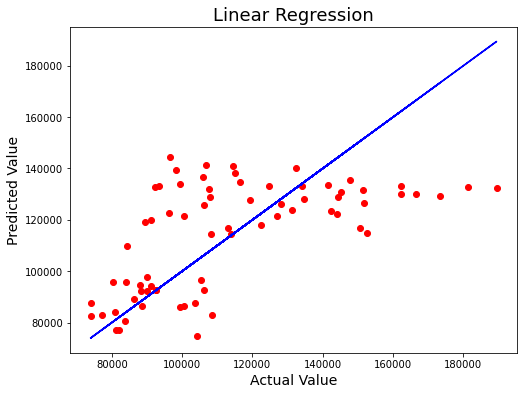

In [187]:
#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [190]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=852)

# Regularization

# 1. Lasso:

In [192]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [193]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [194]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 33.5218053064756
R2_score is :- 39.01567745519434


At cv:- 3
Cross validation score is:- 33.09219971011846
R2_score is :- 39.01567745519434


At cv:- 4
Cross validation score is:- 34.01768733430607
R2_score is :- 39.01567745519434


At cv:- 5
Cross validation score is:- 32.751725127712795
R2_score is :- 39.01567745519434


At cv:- 6
Cross validation score is:- 33.839368141282236
R2_score is :- 39.01567745519434


At cv:- 7
Cross validation score is:- 34.50870271933876
R2_score is :- 39.01567745519434


At cv:- 8
Cross validation score is:- 35.560277950669224
R2_score is :- 39.01567745519434


At cv:- 9
Cross validation score is:- 33.76333869635854
R2_score is :- 39.01567745519434




In [199]:
lsscore_selected=cross_val_score(ls,x,y,cv=8).mean()
print("The value of cv is taken as 8","\nThe cv score is:",lsscore_selected,"\nThe R2_score is:",lss)

The value of cv is taken as 8 
The cv score is: 0.3556027795066922 
The R2_score is: 0.3901567745519434


In [200]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 19501.65593691371
Mean Squared Error: 549221668.7256287
Root Mean Square Error: 23435.478845665362


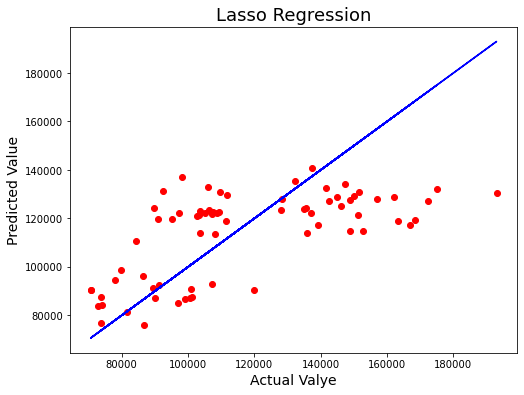

In [201]:
#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Valye',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [202]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


R2 Score: 39.16801252055333
Cross Val Score: 34.276419263413615
Error:
Mean Absolute Error: 19457.663765196474
Mean Squared Error: 547849746.9708134
Root Mean Square Error: 23406.190355775827


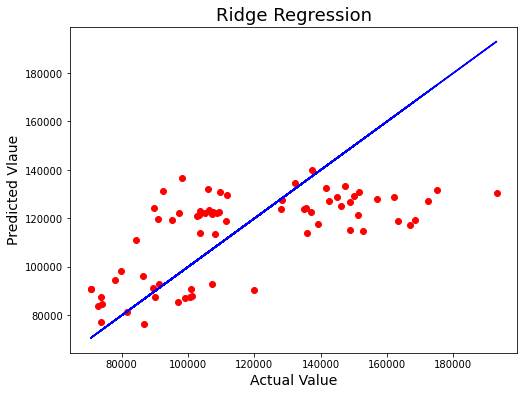

In [203]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd = rd.predict(x_test)

rds = r2_score(y_test,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=4)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rd, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Decision Tree

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

R2 Score: 39.16801252055333
Cross Val Score: -0.3088994734213757
Error:
Mean Absolute Error: 23095.309859154928
Mean Squared Error: 970163563.3591549
Root Mean Square Error: 31147.448745589983


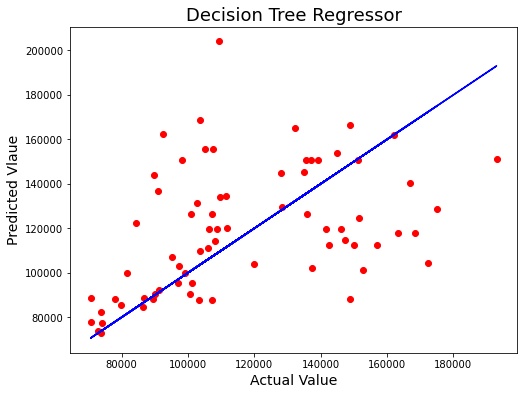

In [205]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr = dtr.predict(x_test)

dtr_r2 = r2_score(y_test,pred_rd)
print('R2 Score:',dtr_r2*100)

dtrscore = cross_val_score(dtr,x,y,cv=4)
dtrcc = dtrscore.mean() 
print('Cross Val Score:',dtrcc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_dtr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()


# Random Forest Regressor

R2 Score: 39.16801252055333
Cross Val Score: 32.010766104153696
Error:
Mean Absolute Error: 18138.04650424772
Mean Squared Error: 587183530.0162859
Root Mean Square Error: 24231.8701303941


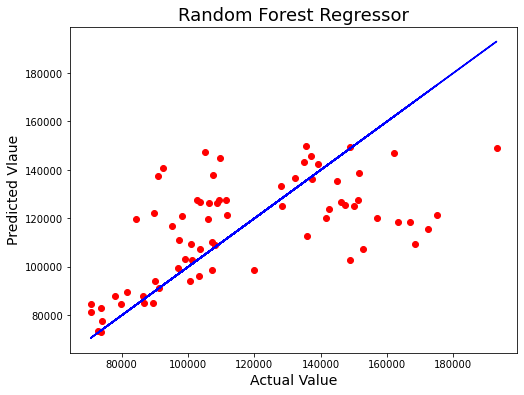

In [206]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rf_r2 = r2_score(y_test,pred_rd)
print('R2 Score:',rf_r2*100)

rf_score = cross_val_score(rf,x,y,cv=4)
rf_cc = rf_score.mean() 
print('Cross Val Score:',rf_cc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rf))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_rf)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rf, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

# Gradient Boosting Regressor

R2 Score: 45.15677189056755
Cross Val Score: 24.723928422946564
Error:
Mean Absolute Error: 17074.110279841654
Mean Squared Error: 493915288.44864345
Root Mean Square Error: 22224.205012747778


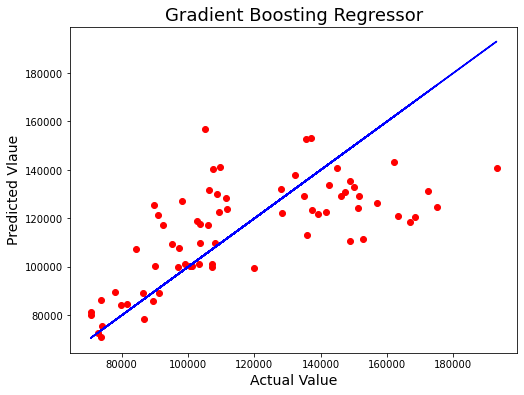

In [207]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(x_train, y_train)
gbr.score(x_train, y_train)
pred_gbr =gbr.predict(x_test)

gbrs= r2_score(y_test,pred_gbr)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=4)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_gbr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_gbr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_gbr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

# Ada Boost Regressor

R2 Score: 47.195176147484275
Cross Val Score: 40.1853819660759
Error:
Mean Absolute Error: 17481.21291905373
Mean Squared Error: 475557524.66929346
Root Mean Square Error: 21807.28145985403


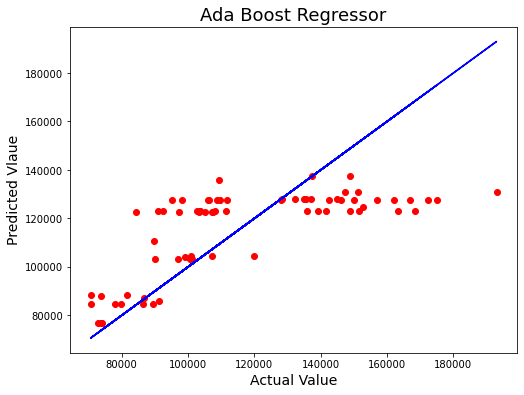

In [209]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50)
ada.fit(x_train,y_train)
ada.score(x_train,y_train)
pred_ada = ada.predict(x_test)

ada_r2 = r2_score(y_test,pred_ada)
print('R2 Score:',ada_r2*100)

ada_score = cross_val_score(ada,x,y,cv=4)
ada_cc = ada_score.mean() 
print('Cross Val Score:',ada_cc*100)

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,pred_ada)))

#Visualizing the predicted values
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_ada, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ada Boost Regressor',fontsize=18)
plt.show()


# Model Selection

# Model Saving:

In [ ]:
import pickle
filename = 'flight-price.pkl'
pickle.dump(gbr, open(filename, 'wb'))

# Creating DataFrame for the predicted values

In [ ]:
#import numpy as np
#a=np.array(y_test)
#a
#predicted=np.array(gbr.predict(x_test))
#predicted
#sal_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
#sal_com